<a href="https://colab.research.google.com/github/cheetah7027/Machine-Learning/blob/main/Building_Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear regression**

Y=wX+b
w=weight
b=bias

**Gradient Descent **
Gradient Descent is an optimization algorithm used for minimizing the loss function in various machine learning algorithms. It is used for updating the parameters of the learning model.
w=w-learning_rate*dw
b=b-learning_rate*db

**Learning Rate**
Learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


In [ ]:
import numpy as np

**Linear Rgression**

In [ ]:
class Linear_Regression():
  #intiating the parameters
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
    #number of training example and no. of features
    self.m,self.n=X.shape #no. of rows and columns
    #initiating the weight and data
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    #implementing gradient descent
    for  i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction=self.predict(self.X)

    #calculate gradient
    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m

    #updating the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db



  def predict(self,X):
    return X.dot(self.w)+self.b



Using Linear Regression model for the predicting

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Preprocessing


In [ ]:
salary_data=pd.read_csv("/content/drive/MyDrive/salary_data.csv") # reading the data using pandas and reading the first five values
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
salary_data.shape

(30, 2)

In [ ]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [ ]:
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


Splitting feature and target

In [ ]:
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

In [ ]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


Splitting the data into training and target data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=2)

Training the linear regression model

In [ ]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [ ]:
model.fit(X_train,Y_train)

Printing the parameter value

In [ ]:
print("Weight:",model.w[0])
print("Bias:",model.b)

Weight: 9514.400999035135
Bias: 23697.406507136307


Predict the salary value fopr the data

In [ ]:
test_data_prediction=model.predict(X_test)

In [ ]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualizing the predicted and real values

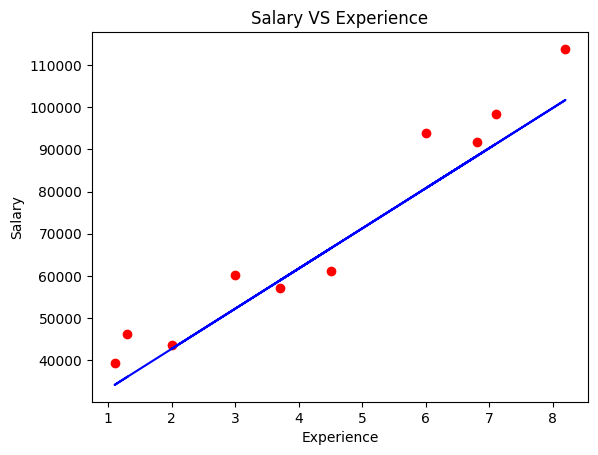

In [ ]:
plt.scatter(X_test,Y_test,color='r')
plt.plot(X_test,test_data_prediction,color='b')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.title("Salary VS Experience")
plt.show()